In [1]:
import pandas as pd
import pubchempy as pcp
import os

In [3]:
rec_lig_df = pd.read_csv("IUPHAR/interactions.csv", skiprows=[0])
rec_lig_df = rec_lig_df[['Target', 'Target ID', 'Ligand', 'Ligand ID']].drop_duplicates().dropna()
rec_lig_df

/tmp/ipykernel_2361482/1604033830.py:1: DtypeWarning: Columns (6,8,9,10,11,39) have mixed types. Specify dtype option on import or set low_memory=False.
  rec_lig_df = pd.read_csv("IUPHAR/interactions.csv", skiprows=[0])


,Target,Target ID,Ligand,Ligand ID
0,12S-LOX,1387.0,ML355,8752
1,15-LOX-1,1388.0,PKUMDL_MH_1001,9141
2,15-LOX-1,1388.0,compound 34 [PMID: 20866075],8751
3,15-LOX-1,1388.0,ML351,10263
4,15-LOX-1,1388.0,PD-146176,11390
...,...,...,...,...
22611,zeta chain of T cell receptor associated prote...,2285.0,aloisine,5923
22612,zeta chain of T cell receptor associated prote...,2285.0,mivavotinib,9600
22613,zeta chain of T cell receptor associated prote...,2285.0,Syk inhibitor II,6047
22614,Zika virus genome polyprotein,2953.0,NSC157058,9652


In [12]:
def contains_invalid_chars(smiles):
    invalid_chars = ['(', ')', '<', '>']
    return any(char in smiles for char in invalid_chars)

TRPV_ligands = rec_lig_df[rec_lig_df['Target ID']==507.0].drop_duplicates()
TRPV_ligands = TRPV_ligands[~TRPV_ligands['Ligand'].apply(contains_invalid_chars)]
TRPV_ligands = TRPV_ligands['Ligand'].tolist()
TRPV_ligands

['anandamide',
 'DkTx',
 'RhTx',
 'zucapsaicin',
 '12S-HPETE',
 '2-APB',
 '5S-HPETE',
 'allicin',
 'arvanil',
 'capsaicin',
 'olvanil',
 'piperine',
 'PPAHV',
 'resiniferatoxin',
 'vanillotoxin-1',
 'vanillotoxin-2',
 'vanillotoxin-3',
 '5S-HETE',
 'camphor',
 'diphenylboronic anhydride',
 'phenylacetylrinvanil',
 'MRS-1477',
 's-RhTx',
 'asivatrep',
 'A-1165442',
 'BCTC',
 'capsazepine',
 'JNJ17203212',
 'JYL1421',
 'mavatrep',
 'ruthenium red',
 'SB452533',
 'SB705498',
 'agatoxin 489',
 'AMG 9810',
 "5'-iodoresiniferatoxin",
 '6-iodo-nordihydrocapsaicin',
 'A425619',
 'A778317',
 'AMG517',
 'AMG628',
 'NADA',
 'SB366791',
 'AZD1386']

In [4]:
#name2pdb 전체 적용
import utils

os.makedirs(os.path.join(os.getcwd(), 'IUPAHR_dock'), exist_ok= True)
for lig in TRPV_ligands['Ligand'].tolist():
    utils.name2pdb(lig, os.path.join(os.getcwd(), 'IUPAHR_dock'))

Converted anandamide to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/anandamide.pdb
Not found: DkTx (404 error)
Not found: RhTx (404 error)
Converted zucapsaicin to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/zucapsaicin.pdb
Converted 12S-HPETE to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/12S-HPETE.pdb
Converted 2-APB to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/2-APB.pdb
Converted 5S-HPETE to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/5S-HPETE.pdb
Converted allicin to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/allicin.pdb
Converted arvanil to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/arvanil.pdb
Converted capsaicin to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/capsaicin.pdb
Converted olvanil to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/olvanil.pdb
Converted piperine to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/piperine.pdb
Converted PPAHV to /ho

In [13]:
import subprocess
    
receptor = "apo_8gfa.pdbqt"
ligands = TRPV_ligands

def run_dock(receptor, ligand):
    try:
        logging.info(f"Processing ligand: {ligand}")
        subprocess.run(["python3", "./dock.py", "-r", receptor, "-l", ligand, "-o", "dockpy_res"], check=True)
        logging.info(f"Completed ligand: {ligand}")
    except subprocess.CalledProcessError as e:
        logging.error(f"Error processing ligand: {ligand}, Error: {e}")

for lig in ligands:
    run_dock(receptor, lig)

2024-06-15 15:01:06,935 - INFO - Processing ligand: anandamide
2024-06-15 15:01:36,602 - INFO - Completed ligand: anandamide
2024-06-15 15:01:36,603 - INFO - Processing ligand: DkTx


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 20

2024-06-15 15:01:37,684 - ERROR - Error processing ligand: DkTx, Error: Command '['python3', './dock.py', '-r', 'apo_8gfa.pdbqt', '-l', 'DkTx', '-o', 'dockpy_res']' returned non-zero exit status 1.
2024-06-15 15:01:37,685 - INFO - Processing ligand: RhTx


Not found: DkTx (404 error)
Error: Converting DkTx pdb file failed, quitting dock


2024-06-15 15:01:38,802 - ERROR - Error processing ligand: RhTx, Error: Command '['python3', './dock.py', '-r', 'apo_8gfa.pdbqt', '-l', 'RhTx', '-o', 'dockpy_res']' returned non-zero exit status 1.
2024-06-15 15:01:38,803 - INFO - Processing ligand: zucapsaicin


Not found: RhTx (404 error)
Error: Converting RhTx pdb file failed, quitting dock


2024-06-15 15:01:55,197 - INFO - Completed ligand: zucapsaicin
2024-06-15 15:01:55,198 - INFO - Processing ligand: 12S-HPETE


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 13

2024-06-15 15:02:24,448 - INFO - Completed ligand: 12S-HPETE
2024-06-15 15:02:24,449 - INFO - Processing ligand: 2-APB


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -1

2024-06-15 15:02:26,364 - INFO - Completed ligand: 2-APB
2024-06-15 15:02:26,365 - INFO - Processing ligand: 5S-HPETE


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... Converted 2-APB to /home/kjs/Downloads/AutoDockTools_py3/pycode/dockpy_res/dock_result_2-APB/2-APB.pdb
Pro

2024-06-15 15:02:55,129 - INFO - Completed ligand: 5S-HPETE
2024-06-15 15:02:55,130 - INFO - Processing ligand: allicin


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 89

2024-06-15 15:03:02,574 - INFO - Completed ligand: allicin
2024-06-15 15:03:02,576 - INFO - Processing ligand: arvanil


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 23

2024-06-15 15:03:44,278 - INFO - Completed ligand: arvanil
2024-06-15 15:03:44,279 - INFO - Processing ligand: capsaicin


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 20

2024-06-15 15:04:01,398 - INFO - Completed ligand: capsaicin
2024-06-15 15:04:01,399 - INFO - Processing ligand: olvanil


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 59

2024-06-15 15:04:38,633 - INFO - Completed ligand: olvanil
2024-06-15 15:04:38,634 - INFO - Processing ligand: piperine


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -9

2024-06-15 15:04:47,273 - INFO - Completed ligand: piperine
2024-06-15 15:04:47,274 - INFO - Processing ligand: PPAHV


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -1

2024-06-15 15:05:56,847 - INFO - Completed ligand: PPAHV
2024-06-15 15:05:56,848 - INFO - Processing ligand: resiniferatoxin


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -1

2024-06-15 15:06:47,076 - INFO - Completed ligand: resiniferatoxin
2024-06-15 15:06:47,077 - INFO - Processing ligand: vanillotoxin-1


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -1

2024-06-15 15:06:48,169 - ERROR - Error processing ligand: vanillotoxin-1, Error: Command '['python3', './dock.py', '-r', 'apo_8gfa.pdbqt', '-l', 'vanillotoxin-1', '-o', 'dockpy_res']' returned non-zero exit status 1.
2024-06-15 15:06:48,170 - INFO - Processing ligand: vanillotoxin-2


Not found: vanillotoxin-1 (404 error)
Error: Converting vanillotoxin-1 pdb file failed, quitting dock


2024-06-15 15:06:49,235 - ERROR - Error processing ligand: vanillotoxin-2, Error: Command '['python3', './dock.py', '-r', 'apo_8gfa.pdbqt', '-l', 'vanillotoxin-2', '-o', 'dockpy_res']' returned non-zero exit status 1.
2024-06-15 15:06:49,236 - INFO - Processing ligand: vanillotoxin-3


Not found: vanillotoxin-2 (404 error)
Error: Converting vanillotoxin-2 pdb file failed, quitting dock


2024-06-15 15:06:50,301 - ERROR - Error processing ligand: vanillotoxin-3, Error: Command '['python3', './dock.py', '-r', 'apo_8gfa.pdbqt', '-l', 'vanillotoxin-3', '-o', 'dockpy_res']' returned non-zero exit status 1.
2024-06-15 15:06:50,302 - INFO - Processing ligand: 5S-HETE


Not found: vanillotoxin-3 (404 error)
Error: Converting vanillotoxin-3 pdb file failed, quitting dock


2024-06-15 15:07:12,616 - INFO - Completed ligand: 5S-HETE
2024-06-15 15:07:12,617 - INFO - Processing ligand: camphor


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 14

2024-06-15 15:07:17,696 - INFO - Completed ligand: camphor
2024-06-15 15:07:17,697 - INFO - Processing ligand: diphenylboronic anhydride


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 31

2024-06-15 15:07:19,363 - INFO - Completed ligand: diphenylboronic anhydride
2024-06-15 15:07:19,364 - INFO - Processing ligand: phenylacetylrinvanil


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... Converted diphenylboronic anhydride to /home/kjs/Downloads/AutoDockTools_py3/pycode/dockpy_res/dock_result

2024-06-15 15:08:32,179 - INFO - Completed ligand: phenylacetylrinvanil
2024-06-15 15:08:32,180 - INFO - Processing ligand: MRS-1477


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 12

2024-06-15 15:08:51,479 - INFO - Completed ligand: MRS-1477
2024-06-15 15:08:51,480 - INFO - Processing ligand: s-RhTx


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 86

2024-06-15 15:08:52,562 - ERROR - Error processing ligand: s-RhTx, Error: Command '['python3', './dock.py', '-r', 'apo_8gfa.pdbqt', '-l', 's-RhTx', '-o', 'dockpy_res']' returned non-zero exit status 1.
2024-06-15 15:08:52,563 - INFO - Processing ligand: asivatrep


Not found: s-RhTx (404 error)
Error: Converting s-RhTx pdb file failed, quitting dock


2024-06-15 15:09:17,533 - INFO - Completed ligand: asivatrep
2024-06-15 15:09:17,534 - INFO - Processing ligand: A-1165442


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 18

2024-06-15 15:09:32,661 - INFO - Completed ligand: A-1165442
2024-06-15 15:09:32,662 - INFO - Processing ligand: BCTC


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 12

2024-06-15 15:09:44,347 - INFO - Completed ligand: BCTC
2024-06-15 15:09:44,348 - INFO - Processing ligand: capsazepine


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -3

2024-06-15 15:10:00,203 - INFO - Completed ligand: capsazepine
2024-06-15 15:10:00,204 - INFO - Processing ligand: JNJ17203212


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -2

2024-06-15 15:10:14,713 - INFO - Completed ligand: JNJ17203212
2024-06-15 15:10:14,714 - INFO - Processing ligand: JYL1421


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -1

2024-06-15 15:10:34,000 - INFO - Completed ligand: JYL1421
2024-06-15 15:10:34,001 - INFO - Processing ligand: mavatrep


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -5

2024-06-15 15:10:51,147 - INFO - Completed ligand: mavatrep
2024-06-15 15:10:51,147 - INFO - Processing ligand: ruthenium red


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -1

2024-06-15 15:10:52,244 - ERROR - Error processing ligand: ruthenium red, Error: Command '['python3', './dock.py', '-r', 'apo_8gfa.pdbqt', '-l', 'ruthenium red', '-o', 'dockpy_res']' returned non-zero exit status 1.
2024-06-15 15:10:52,245 - INFO - Processing ligand: SB452533


Not found: ruthenium red (404 error)
Error: Converting ruthenium red pdb file failed, quitting dock


2024-06-15 15:11:05,239 - INFO - Completed ligand: SB452533
2024-06-15 15:11:05,239 - INFO - Processing ligand: SB705498


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 22

2024-06-15 15:11:18,994 - INFO - Completed ligand: SB705498
2024-06-15 15:11:18,995 - INFO - Processing ligand: agatoxin 489


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 11

2024-06-15 15:11:21,128 - INFO - Completed ligand: agatoxin 489
2024-06-15 15:11:21,129 - INFO - Processing ligand: AMG 9810


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... Converted agatoxin 489 to /home/kjs/Downloads/AutoDockTools_py3/pycode/dockpy_res/dock_result_agatoxin_489

2024-06-15 15:11:22,750 - INFO - Completed ligand: AMG 9810
2024-06-15 15:11:22,751 - INFO - Processing ligand: 5'-iodoresiniferatoxin


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... Converted AMG 9810 to /home/kjs/Downloads/AutoDockTools_py3/pycode/dockpy_res/dock_result_AMG_9810/AMG_981

2024-06-15 15:11:24,419 - INFO - Completed ligand: 5'-iodoresiniferatoxin
2024-06-15 15:11:24,420 - INFO - Processing ligand: 6-iodo-nordihydrocapsaicin


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... Converted 5'-iodoresiniferatoxin to /home/kjs/Downloads/AutoDockTools_py3/pycode/dockpy_res/dock_result_5'

2024-06-15 15:11:25,515 - ERROR - Error processing ligand: 6-iodo-nordihydrocapsaicin, Error: Command '['python3', './dock.py', '-r', 'apo_8gfa.pdbqt', '-l', '6-iodo-nordihydrocapsaicin', '-o', 'dockpy_res']' returned non-zero exit status 1.
2024-06-15 15:11:25,516 - INFO - Processing ligand: A425619


Not found: 6-iodo-nordihydrocapsaicin (404 error)
Error: Converting 6-iodo-nordihydrocapsaicin pdb file failed, quitting dock


2024-06-15 15:11:37,446 - INFO - Completed ligand: A425619
2024-06-15 15:11:37,447 - INFO - Processing ligand: A778317


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -2

2024-06-15 15:11:49,273 - INFO - Completed ligand: A778317
2024-06-15 15:11:49,274 - INFO - Processing ligand: AMG517


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -1

2024-06-15 15:12:05,633 - INFO - Completed ligand: AMG517
2024-06-15 15:12:05,635 - INFO - Processing ligand: AMG628


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -9

2024-06-15 15:12:30,977 - INFO - Completed ligand: AMG628
2024-06-15 15:12:30,978 - INFO - Processing ligand: NADA


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -8

2024-06-15 15:13:12,805 - INFO - Completed ligand: NADA
2024-06-15 15:13:12,806 - INFO - Processing ligand: SB366791


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -6

2024-06-15 15:13:22,338 - INFO - Completed ligand: SB366791
2024-06-15 15:13:22,339 - INFO - Processing ligand: AZD1386


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 12

2024-06-15 15:13:34,408 - INFO - Completed ligand: AZD1386


#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 52

In [1]:
import os
import pandas as pd

def parse_log_file(log_file):
    """Parse the log file to extract the compound name and affinity value."""
    with open(log_file, 'r') as file:
        lines = file.readlines()
    
    compound_name = os.path.basename(log_file).replace('r_docked_', '').replace('.log', '')
    affinity = None
    
    for line in lines:
        if line.strip().startswith('1'):
            parts = line.split()
            if len(parts) > 1:
                try:
                    affinity = float(parts[1])
                except ValueError:
                    continue
            break
    
    return compound_name, affinity

def process_log_files(log_dir):
    """Process all log files in the specified directory and return a DataFrame."""
    data = []

    for root, dirs, files in os.walk(log_dir):
        for log_file in files:
            if log_file.endswith('.log'):
                log_path = os.path.join(root, log_file)
                compound_name, affinity = parse_log_file(log_path)
                if affinity is not None:
                    data.append((compound_name, affinity))
    
    df = pd.DataFrame(data, columns=['INCI', 'Affinity'])
    return df

# 로그 파일들이 있는 디렉토리 경로를 지정합니다.
log_dir = './dockpy_res/'

# 로그 파일들을 처리하여 데이터프레임 생성
df = process_log_files(log_dir)
df


,INCI,Affinity
0,allicin,-4.6
1,BCTC,-7.8
2,SB705498,-9.0
3,MRS-1477,-6.0
4,camphor,-6.3
5,JNJ17203212,-9.7
6,capsazepine,-8.9
7,SB366791,-9.6
8,resiniferatoxin,-10.9
9,AMG517,-9.3


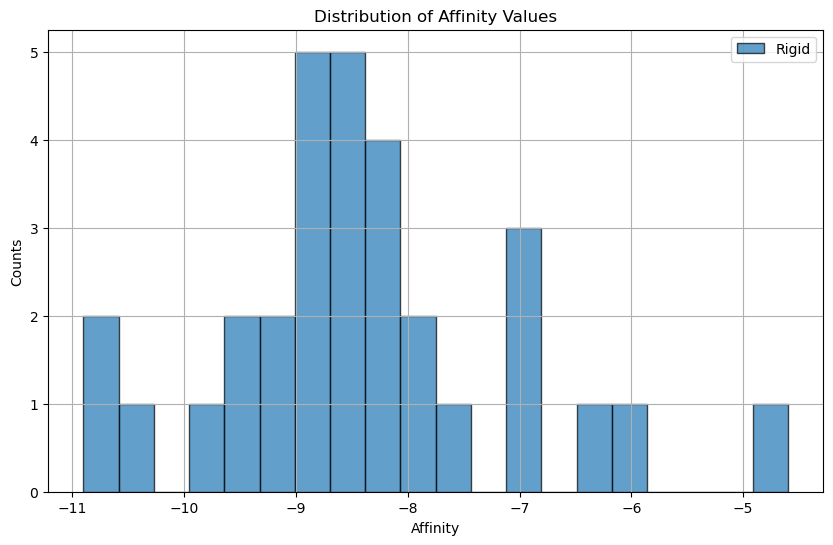

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Affinity'], bins=20, edgecolor='k', alpha=0.7, label='Rigid')
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()
